In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1 - Which year had the highest salary total?

In [17]:
highest_year = salaries.groupby(['yearID']).sum('salary')
print(highest_year.nlargest(5,'salary'))

            salary
yearID            
2016    3750137392
2015    3514142569
2014    3192317623
2013    3034525648
2012    2932741192


Text(0.5, 1.0, 'MLB Salaries\n1985-2016')

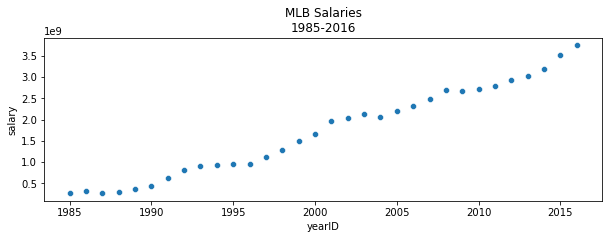

In [21]:
plt.figure(figsize = (10,3))
sns.scatterplot(x='yearID', y = 'salary', data = highest_year).set_title('MLB Salaries\n1985-2016')

In [22]:
# Clearly the league is extremely successful and growing...

# Question 2 (couple parts) How expensive are teams and what do players cost for them? 

In [24]:
highest_salary_team = salaries.groupby('teamID').sum('salary')['salary']
print(highest_salary_team.nlargest())

teamID
NYA    3718869083
BOS    2802350096
LAN    2674847083
NYN    2251200033
SFN    2176708366
Name: salary, dtype: int64


In [25]:
highest_salary_team = salaries.groupby(['yearID','teamID']).sum('salary')['salary']
print(highest_salary_team.nlargest(10))

yearID  teamID
2013    NYA       231978886
        LAN       223362196
2016    NYA       222997792
        LAN       221288380
2014    LAN       217014600
2015    LAN       215792000
        NYA       212751957
2005    NYA       208306817
2008    NYA       207896789
2010    NYA       206333389
Name: salary, dtype: int64


In [27]:
highest_salary_player = salaries.groupby(['yearID','teamID','playerID']).sum('salary')['salary']
print(highest_salary_player.nlargest(10))

yearID  teamID  playerID 
2009    NYA     rodrial01    33000000
2010    NYA     rodrial01    33000000
2016    LAN     kershcl01    33000000
2015    LAN     kershcl01    32571000
2011    NYA     rodrial01    32000000
2016    ARI     greinza01    31799030
2012    NYA     rodrial01    30000000
2016    BOS     priceda01    30000000
2013    NYA     rodrial01    29000000
2008    NYA     rodrial01    28000000
Name: salary, dtype: int64


In [26]:
# It's clear the Yankees and Dodgers are paying the highest prices for players although their championship 
# calibar teams are assembled, they've not churned out championships with these high payrolls as one would expect. 

# Compare the Yankees highest paid salaries and their impact on the team's financials

In [28]:
yankee = salaries[salaries["teamID"] == 'NYA']
yankee_total_sal = yankee.groupby(['yearID', 'teamID']).sum('salary')
yankee_merged = pd.merge(yankee,yankee_total_sal, left_on = 'yearID', right_on = 'yearID')
yankee_merged = yankee_merged.rename(columns = {'salary_x':'salary_player','salary_y':'salary_team'})
yankee_merged['% Salary'] = ((yankee_merged['salary_player'] / yankee_merged['salary_team'])*100)
yankee_merged_10 = yankee_merged.nlargest(10,columns = '% Salary')
yankee_merged_10

,yearID,teamID,lgID,playerID,salary_player,salary_team,% Salary
735,2009,NYA,AL,rodrial01,33000000,201449189,16.381302
759,2010,NYA,AL,rodrial01,33000000,206333389,15.993534
790,2011,NYA,AL,rodrial01,32000000,202275028,15.820045
816,2012,NYA,AL,rodrial01,30000000,196522289,15.265444
372,1997,NYA,AL,fieldce01,9237500,62241545,14.841373
232,1992,NYA,AL,tartada01,5300000,37543334,14.117020
711,2008,NYA,AL,rodrial01,28000000,207896789,13.468221
485,2000,NYA,AL,willibe02,12357143,92338260,13.382473
461,2000,NYA,AL,coneda01,12000000,92338260,12.995696
129,1989,NYA,AL,mattido01,2200000,17114375,12.854691


<AxesSubplot:title={'center':'Top 10 Players Salaries\ncompared to Team Salaries'}, xlabel='yearID', ylabel='salary_player'>

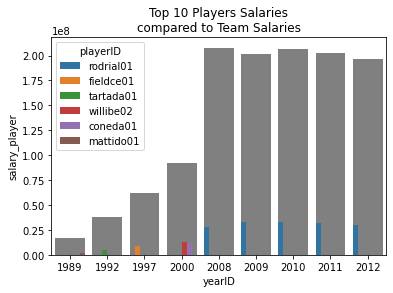

In [31]:
sns.barplot(x = 'yearID', y = 'salary_team',color = "grey",data = yankee_merged_10).set_title('Top 10 Players Salaries\ncompared to Team Salaries')
sns.barplot(x = 'yearID', y = 'salary_player', data = yankee_merged_10, hue = 'playerID')

# Compare Yankees and Red Sox Salaries

C:\Users\weard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weard\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\weard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weard\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in fav

<AxesSubplot:xlabel='yearID', ylabel='salary'>

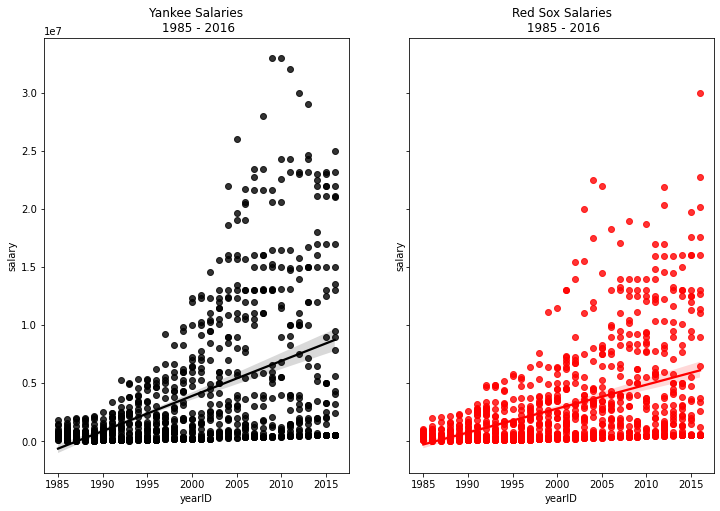

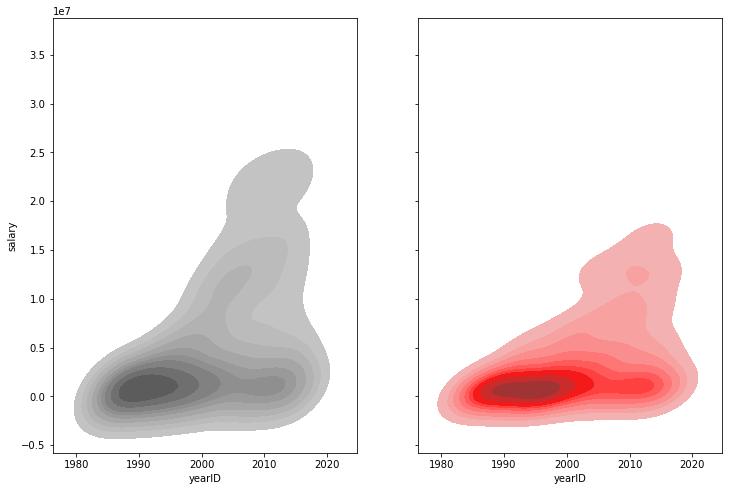

In [30]:
# Respective Salaries
yankee = salaries[salaries["teamID"] == 'NYA']
redsox = salaries[salaries["teamID"] == 'BOS']

# Create figure with scatter plots

fig1, axs1 = plt.subplots(ncols = 2, figsize = (12,8),sharex = True, sharey = True)
sns.regplot(x = 'yearID', y = 'salary', color = 'black',data = yankee, ax = axs1[0]).set_title('Yankee Salaries\n 1985 - 2016')
sns.regplot(x = 'yearID', y = 'salary', color = 'red', data = redsox, ax = axs1[1]).set_title('Red Sox Salaries\n 1985 - 2016')

# Create kde plots
fig2, axs2 = plt.subplots(ncols = 2, figsize = (12,8), sharex = True, sharey = True)
sns.kdeplot(yankee.yearID, yankee.salary,  color = 'black', shade = True, shade_lowest = False, ax = axs2[0])
sns.kdeplot(redsox.yearID, redsox.salary, color = 'red',shade = True, shade_lowest = False, ax = axs2[1])


decade
1980    6.062148e+05
1990    1.826639e+06
2000    6.368099e+06
2010    7.392221e+06
Name: salary, dtype: float64


C:\Users\weard\AppData\Local\Temp/ipykernel_8184/2460106253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yankee['decade'] = np.select(conditions, values)


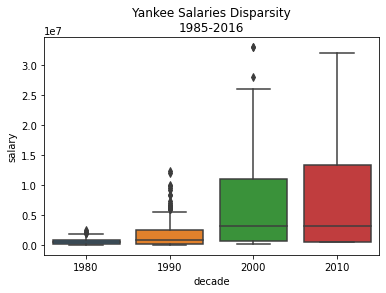

In [33]:
# Compare the average salaries by decade

conditions = [(yankee['yearID'] <=1990), 
              (yankee['yearID'] >= 1991) & (yankee['yearID']<= 2000),
              (yankee['yearID'] >= 2001) & (yankee['yearID']<= 2010),
              (yankee['yearID'] >= 2011) & (yankee['yearID']<= 2016),
             ]
values = ('1980', '1990', '2000','2010')
yankee['decade'] = np.select(conditions, values)
yankee.head()

sns.boxplot(x = 'decade', y = yankee['salary'], data = yankee).set_title('Yankee Salaries Disparsity\n1985-2016')
print(yankee.groupby('decade').mean('salary')['salary'])